In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
train = pd.read_csv('MNIST/mnist_train.csv')
test = pd.read_csv('MNIST/mnist_test.csv')

In [18]:
train.head()
# 28x28 = 784 pixels

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Split the data into X and y
x_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

x_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [20]:
!mkdir -p plots

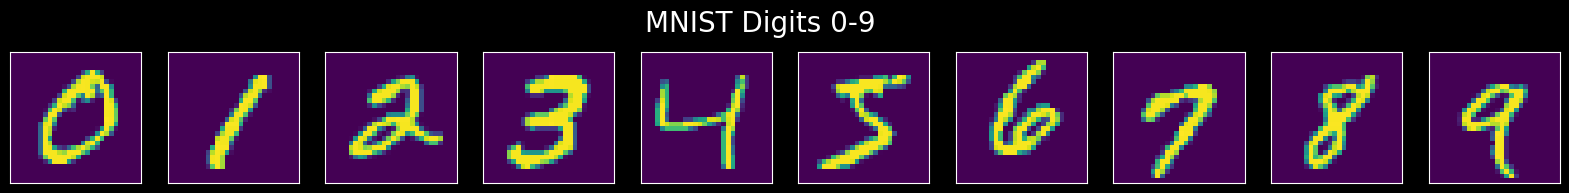

In [21]:
# Plot digits 0-9
plt.figure(figsize=(20,5))
plt.suptitle('MNIST Digits 0-9', fontsize=20)
plt.style.use('dark_background')
plt.tight_layout()
plt.subplots_adjust(top=1.42)

rows = 1
cols = 10

for i in range(rows*cols):
    ax = plt.subplot(rows, cols, i+1)
    for j,k in enumerate(x_train):
        if y_train[j] == i:
            image = np.array(k).reshape(28,28)
            plt.imshow(image)
            ax.set_xticks(())
            ax.set_yticks(())
            break

plt.savefig('plots/mnist_digits.png')

In [22]:
ones = []
for i,v in enumerate(y_train):
    if v == 1:
        ones.append(x_train[i])

sevens = []
for i,v in enumerate(y_train):
    if v == 7:
        sevens.append(x_train[i])

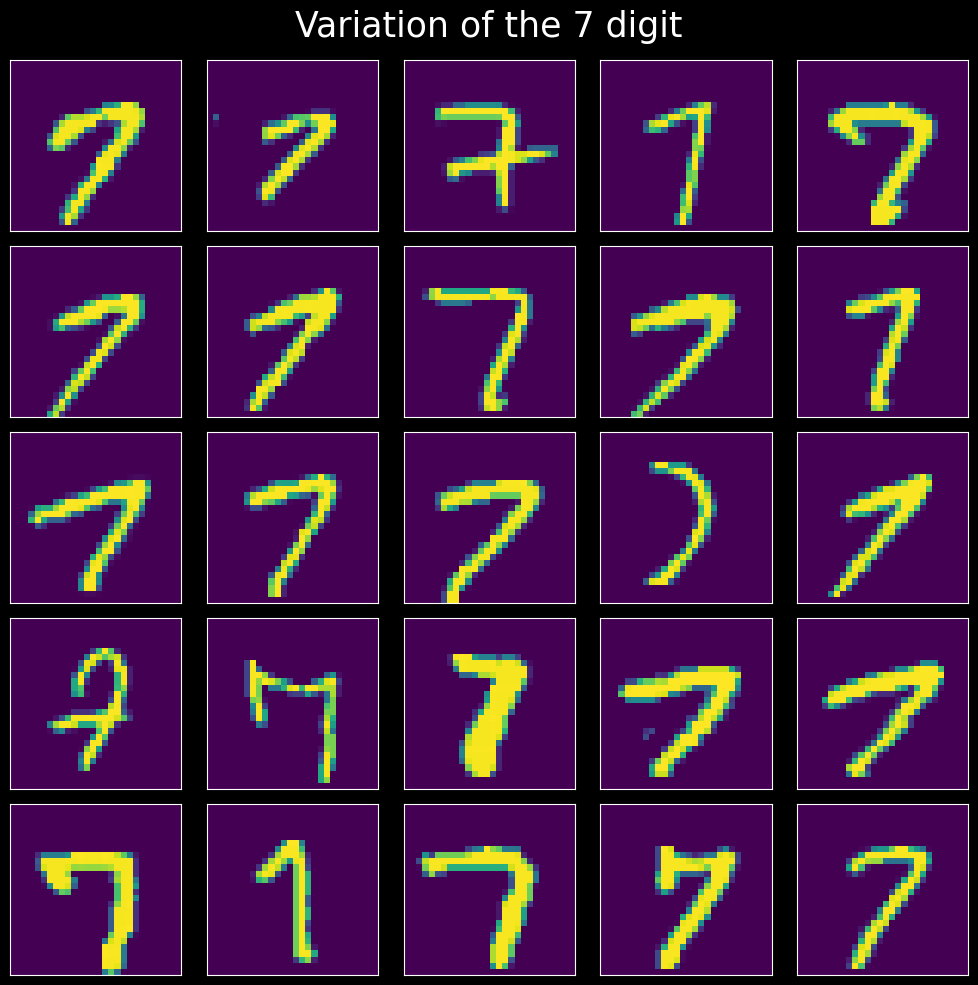

In [23]:
# Plot the variability of the 1 digit examples
plt.figure(figsize=(10, 10))

rows = 5
columns = 5

for i in range(rows*columns):
    ax = plt.subplot(rows, columns, i + 1)
    image = np.array(sevens[i]).reshape(28,28)
    ax.imshow(image)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.suptitle('Variation of the 7 digit', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig('plots/sevens.png')

Use Principle Component Analysis (PCA) on the training set to reduce the dimension of the input. How many modes do you need to preserve 95% of the variance in the training set?

In [24]:
# Implement Principal Component Analysis (PCA) from scratch to reduce input size of image data
x_train = x_train[(y_train == 1) | (y_train == 9)]
y_train = y_train[(y_train == 1) | (y_train == 9)]

mean = np.mean(x_train, axis=0)
# x_centered = x_train - mean

cov = np.cov(x_train.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = np.real(eigenvalues[idx])
eigenvectors = np.real(eigenvectors[:,idx])

# Compute the cumulative sum of the sorted eigenvalues
total = sum(eigenvalues)
var_exp = [(i / total) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Determine the number of modes needed to preserve 95% of the variance
k = np.argmax(cum_var_exp >= 0.95) + 1
print("Number of modes to preserve 95% of variance:", k)

# Compute the first k principal components
pca = eigenvectors[:, :k]

# Transform the data to the new space
x_train_pca = np.dot(x_centered, pca)
# x_test_pca = np.dot(x_test_centered, pca)

Number of modes to preserve 95% of variance: 108


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_pca, y_train, test_size=0.2)
# change labels to be -1 and 1
y_train[y_train == 1] = -1
y_train[y_train == 9] = 1

In [14]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score

In [15]:
# perform kernel regression using the rbf_kernel function
clf = KernelRidge(alpha=1.0, kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy:", accuracy)



Accuracy: 0.0


In [ ]:
x_train_pca.shape, x_test_pca.shape

((60000, 154), (10000, 154))

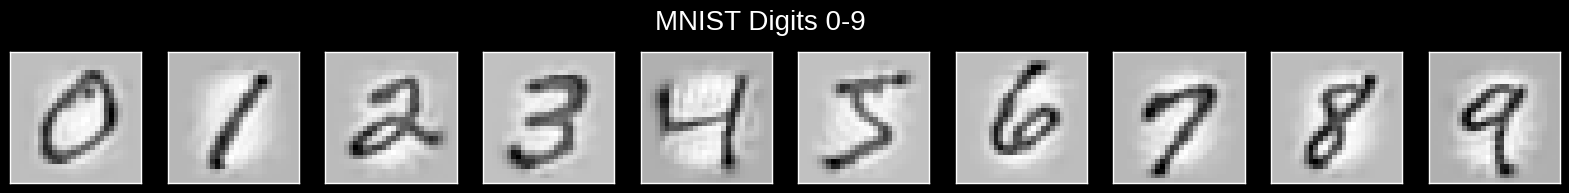

In [ ]:
# Plot PCA reduced dimension images
plt.figure(figsize=(20,5))
plt.suptitle('MNIST Digits 0-9', fontsize=20)
plt.style.use('dark_background')
plt.tight_layout()
plt.subplots_adjust(top=1.42)
rows = 1
cols = 10

for i in range(rows*cols):
    ax = plt.subplot(rows, cols, i+1)
    for j,k in enumerate(x_train_pca):
        if y_train[j] == i:
            image = np.dot(pca, k).reshape(28,28)
            plt.imshow(image)
            ax.set_xticks(())
            ax.set_yticks(())
            break

plt.savefig('plots/mnist_pca.png')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [ ]:
# Extract digits 1 and 9 from the training set
x_train_19 = x_train[(y_train == 1) | (y_train == 9)]
y_train_19 = y_train[(y_train == 1) | (y_train == 9)]

In [68]:
# Reduce the dimensionality of the data using PCA
mean = np.mean(x_train_19, axis=0)
x_train_19_centered = x_train_19 - mean
covariance = np.cov(x_train_19_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance)
idx = eigenvalues.argsort()[::-1]
eigenvalues = np.real(eigenvalues[idx])
eigenvectors = np.real(eigenvectors[:,idx])
total = sum(eigenvalues)
var_exp = [(i / total) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
k = np.argmax(cum_var_exp >= 0.95) + 1
pca = eigenvectors[:, :k]
x_train_19_pca = np.dot(x_train_19_centered, pca)

In [84]:
# Define the kernel functions
def rbf_kernel(x, y, sigma=1.0):
    pairwise_dists = np.sum(x ** 2, axis=1)[:, np.newaxis] + np.sum(y ** 2, axis=1) - 2 * np.dot(x, y.T)
    return np.exp(-pairwise_dists / (2 * sigma ** 2))

def polynomial_kernel(x, y, p=2):
    return (1 + np.dot(x, y.T)) ** p

def linear_kernel(x, y):
    return np.dot(x, y.T)

# Define kernel regression function
def kernel_regression(x_train, y_train, x_test, kernel, **kwargs):
    K = kernel(x_train, x_train, **kwargs)
    alpha = np.dot(np.linalg.pinv(K), y_train)
    y_pred = np.dot(kernel(x_test, x_train, **kwargs), alpha)
    return y_pred

# Define cross-validation function
def cross_val(x, y, kernel, k_folds=5, **kwargs):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    train_err = []
    val_err = []
    for train_index, val_index in kf.split(x):
        x_train_fold, x_val_fold = x[train_index], x[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        y_train_pred_fold = kernel_regression(x_train_fold, y_train_fold, x_train_fold, kernel, **kwargs)
        train_err.append(mean_squared_error(y_train_pred_fold, y_train_fold))
        y_val_pred_fold = kernel_regression(x_train_fold, y_train_fold, x_val_fold, kernel, **kwargs)
        val_err.append(mean_squared_error(y_val_pred_fold, y_val_fold))
    return np.mean(train_err), np.mean(val_err)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_train_19_pca, y_train_19, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [12691, 7106]

In [70]:
# # Train the classifiers
# kernels = ['RBF', 'Polynomial', 'Linear']
# kernel_params = [
#     {'sigma': 1.0},
#     {'p': 2},
#     {}
# ]
# train_err = []
# test_err = []
# for kernel, kernel_param in zip(kernels, kernel_params):
#     print(f'Training {kernel} kernel')

In [71]:
# from numpy.linalg import inv
# from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel

# class KernelRegression:
#     def __init__(self, kernel='rbf', degree=2, gamma=0.1, C=1, nugget=1e-6):
#         self.kernel = kernel
#         self.degree = degree
#         self.gamma = gamma
#         self.C = C
#         self.nugget = nugget

#     def fit(self, X, y):
#         self.x_train = X
#         self.y_train = y

#     def predict(self, X):
#         K = self._get_kernel(self.x_train, X)
#         y_pred = K.T @ inv(K @ K.T + self.nugget*np.eye(K.shape[0])) @ self.y_train
#         return y_pred

#     def _get_kernel(self, X1, X2):
#         if self.kernel == 'rbf':
#             return rbf_kernel(X1, X2, gamma=self.gamma)
#         elif self.kernel == 'poly':
#             return polynomial_kernel(X1, X2, degree=self.degree, gamma=self.gamma, coef0=1)
#         elif self.kernel == 'linear':
#             return linear_kernel(X1, X2)

In [78]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train_19_pca, y_train_19, test_size=0.3, random_state=42)

In [82]:
#import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Train and test RBF kernel regression
rbf_regressor = KernelRegression(kernel='rbf', gamma=1.0)
rbf_regressor.fit(x_train, y_train)
y_train_pred = rbf_regressor.predict(x_train)
y_test_pred = rbf_regressor.predict(x_test)
train_acc = accuracy_score(y_train, np.round(y_train_pred))
test_acc = accuracy_score(y_test, np.round(y_test_pred))
print('RBF Kernel Regression:')
print(f'Training accuracy: {train_acc:.3f}')
print(f'Test accuracy: {test_acc:.3f}\n')

# Train and test polynomial kernel regression
poly_regressor = KernelRegression(kernel='poly', degree=2, gamma=0.1, C=1)
poly_regressor.fit(x_train, y_train)
y_train_pred = poly_regressor.predict(x_train)
y_test_pred = poly_regressor.predict(x_test)
train_acc = accuracy_score(y_train, np.round(y_train_pred))
test_acc = accuracy_score(y_test, np.round(y_test_pred))
print('Polynomial Kernel Regression:')
print(f'Training accuracy: {train_acc:.3f}')
print(f'Test accuracy: {test_acc:.3f}\n')

# Train and test linear kernel regression
linear_regressor = KernelRegression(kernel='linear')
linear_regressor.fit(x_train, y_train)
y_train_pred = linear_regressor.predict(x_train)
y_test_pred = linear_regressor.predict(x_test)
train_acc = accuracy_score(y_train, np.round(y_train_pred))
test_acc = accuracy_score(y_test, np.round(y_test_pred))
print('Linear Kernel Regression:')
print(f'Training accuracy: {train_acc:.3f}')
print(f'Test accuracy: {test_acc:.3f}\n')

RBF Kernel Regression:
Training accuracy: 1.000
Test accuracy: 0.000

Polynomial Kernel Regression:
Training accuracy: 0.000
Test accuracy: 0.000

Linear Kernel Regression:
Training accuracy: 0.000
Test accuracy: 0.000



In [85]:
# Extract the digits 1 and 9 from the training set
idx_1 = np.where(y_train == 1)[0]
idx_9 = np.where(y_train == 9)[0]
idx = np.concatenate([idx_1, idx_9])
x_train_19 = x_train_pca[idx, :]
y_train_19 = y_train[idx]
y_train_19[y_train_19 == 1] = -1  # label 1 as -1
y_train_19[y_train_19 == 9] = 1  # label 9 as 1

# Split the data into training and test sets
x_train_19, x_test_19, y_train_19, y_test_19 = train_test_split(x_train_19, y_train_19, test_size=0.2, random_state=42)

# Cross-validate to tune the hyperparameters
best_kernel = None
best_sigma = None
best_val_err = float('inf')
for kernel in [rbf_kernel, polynomial_kernel, linear_kernel]:
    if kernel == rbf_kernel:
        sigmas = np.logspace(-3, 3, 7)
    else:
        sigmas = [None]
    for sigma in sigmas:
        train_err, val_err = cross_val(x_train_19, y_train_19, kernel, sigma=sigma)
        if val_err < best_val_err:
            best_kernel = kernel
            best_sigma = sigma
            best_val_err = val_err

print('Best kernel:', best_kernel.__name__)
print('Best sigma:', best_sigma)
print('Best validation error:', best_val_err)

# Train the kernel regression model with the best hyperparameters
alpha = np.dot(np.linalg.pinv(best_kernel(x_train_19, x_train_19, sigma=best_sigma)), y_train_19)
y_train_pred = np.dot(best_kernel(x_train_19, x_train_19, sigma=best_sigma), alpha)
y_test_pred = np.dot(best_kernel(x_test_19, x_train_19, sigma=best_sigma), alpha)

# Evaluate the model
y_train_pred[y_train_pred >= 0] = 1
y_train_pred[y_train_pred < 0] = -1
y_test_pred[y_test_pred >= 0] = 1
y_test_pred[y_test_pred < 0] = -1

train_acc = accuracy_score(y_train_19, y_train_pred)
test_acc = accuracy_score(y_test_19, y_test_pred)

print('Training accuracy:', train_acc)
print('Test accuracy:', test_acc)

KeyboardInterrupt: 

In [ ]:
def polynomial_kernel(X, Y, c, p):
    """
        Compute the polynomial kernel between two matrices X and Y::
            K(x, y) = (<x, y> + c)^p
        for each pair of rows x in X and y in Y.

        Args:
            X - (n, d) NumPy array (n datapoints each with d features)
            Y - (m, d) NumPy array (m datapoints each with d features)
            c - a coefficient to trade off high-order and low-order terms (scalar)
            p - the degree of the polynomial kernel

        Returns:
            kernel_matrix - (n, m) Numpy array containing the kernel matrix
    """
#     return (X @ Y.T + c).astype(np.float32) ** p
    return (X @ Y.T + c) ** p

def rbf_kernel(X, Y, gamma):
    """
        Compute the Gaussian RBF kernel between two matrices X and Y::
            K(x, y) = exp(-gamma ||x-y||^2)
        for each pair of rows x in X and y in Y.

        Args:
            X - (n, d) NumPy array (n datapoints each with d features)
            Y - (m, d) NumPy array (m datapoints each with d features)
            gamma - the gamma parameter of gaussian function (scalar)

        Returns:
            kernel_matrix - (n, m) Numpy array containing the kernel matrix
    """
    return np.exp(-gamma * ((X ** 2).sum(axis=1)[None].T + (Y ** 2).sum(axis=1) - 2 * X @ Y.T))

In [ ]:
kernel = lambda X, Y: polynomial_kernel(X, Y, 1, 3)
# # kernel = lambda X, Y: X@Y.T
alpha = 1
temp_parameter = 10
lambda_factor = 1e-4